#**3D Diffse**
##Standard Settings
**Particle = $^{199}Hg$**

**Gyromagnetic ratio = $-4.84578839927 \times 10^7\,\frac{1}{T s}$**

**Magnetic field ($B_0$) = $1\,\mu T$**

**Electric field ($E_0$) = $1\,\frac{MV}{m}$**

**Precession time = $1\,s$**

**Chamber height = $12\,cm$**

**Chamber radius = $23.5\,cm$**

**2D simulations**

**Each point represents the results of 10000 particles ran for both parallel and anti-parallel configurations**

In [1]:
%matplotlib inline
import srkdata
import srkmisc
import matplotlib.pyplot as plt
import numpy as np
import math
import srkanalysis
from scipy.optimize import curve_fit
from matplotlib.legend_handler import HandlerLine2D
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams['xtick.labelsize'] = 20

srk_sys=srkdata.SRKSystems

e_field =1e6
meas_time = 1

b_gradient_str = [1.e-10, 1.e-9, 1.e-8]
Omega_range=srkmisc.even_sample_over_log(.1, 10, 100)
legend_titles_b_gradients=[str(x)+' T/m B Gradient' for x in b_gradient_str]
omega_0=(4.84578839927e7*1e-6)
Omega_scale_factor= 0.235*(4.84578839927e7*1e-6)
eta=0.235*omega_0*1e6/(1e-6*299792458*299792458)

##**Diffuse reflection probability = $100\%$**

In [2]:
lines = srkmisc.chunk_list(range(1986,2285),100)+[range(2286, 2386),range(2386, 2486),range(2486, 2586)]
legend_titles_dipole = ["{:.2e}".format(srkdata.get_data_for_rids_from_database([x[0]],"DipoleFieldStrength")[0][0]
)+ ' T M^3 Dipole Strength' for x in lines[:3]]+[str(x)+' T/m Linear Gradient' for x in b_gradient_str]
print legend_titles_dipole

['1.00e-18 T M^3 Dipole Strength', '1.00e-16 T M^3 Dipole Strength', '1.00e-14 T M^3 Dipole Strength', '1e-10 T/m Linear Gradient', '1e-09 T/m Linear Gradient', '1e-08 T/m Linear Gradient']


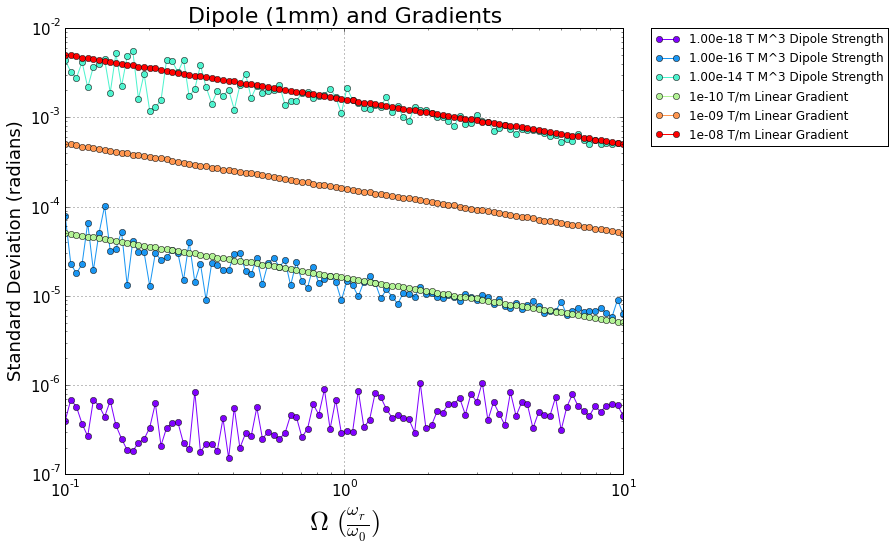

In [3]:
x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "Par_PhiStDev")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    Omega=[j/Omega_scale_factor for j in x[i]]
    plt.loglog(Omega,y[i],marker='o',label = legend_titles_dipole[i],c=next(color))

plt.tick_params(labelsize=15)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=26)
plt.ylabel('Standard Deviation (radians)', fontsize=18)
plt.title('Dipole (1mm) and Gradients', fontsize=22)
plt.grid(True)
#plt.axis([ 8e-19, 2e-13,1e-3, 2e2])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

##**No Electric Field**

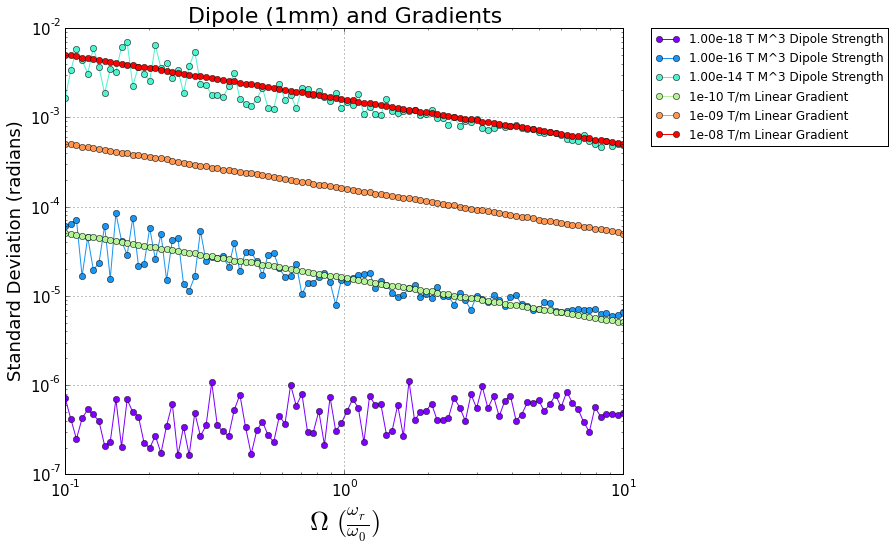

In [4]:
lines = srkmisc.chunk_list(range(4952, 5252),100)+[range(2286, 2386),range(2386, 2486),range(2486, 2586)]
x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "Par_PhiStDev")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    Omega=[j/Omega_scale_factor for j in x[i]]
    plt.loglog(Omega,y[i],marker='o',label = legend_titles_dipole[i],c=next(color))

plt.tick_params(labelsize=15)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=26)
plt.ylabel('Standard Deviation (radians)', fontsize=18)
plt.title('Dipole (1mm) and Gradients', fontsize=22)
plt.grid(True)
#plt.axis([ 8e-19, 2e-13,1e-3, 2e2])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

IndexError: list index out of range

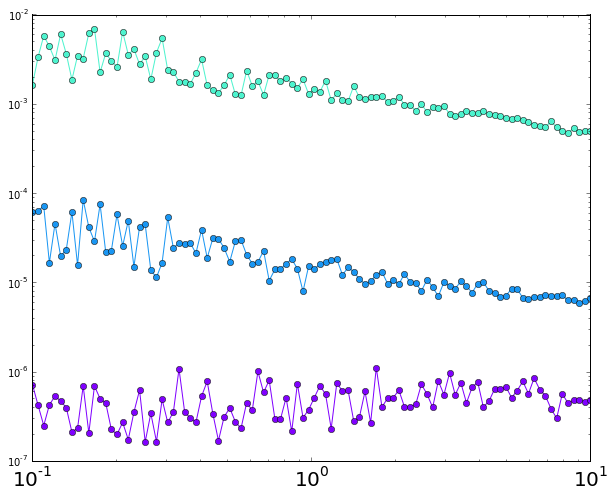

In [5]:
x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "Par_PhiStDev")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    Omega=[j/Omega_scale_factor for j in x[i]]
    plt.loglog(Omega,y[i],marker='o',label = legend_titles_b_gradients[i],c=next(color))

plt.tick_params(labelsize=15)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=26)
plt.ylabel('Standard Deviation (radians)', fontsize=18)
plt.title('Standard Deviation', fontsize=22)
plt.grid(True)
#plt.axis([ 8e-19, 2e-13,1e-3, 2e2])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

IndexError: list index out of range

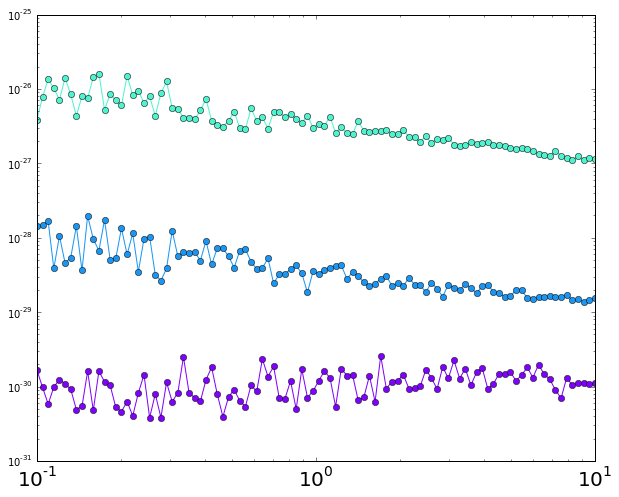

In [6]:
x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "Par_PhiStDev")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    Omega=[j/Omega_scale_factor for j in x[i]]
    false_edm_error=[srkanalysis.convert_std_dev_to_false_edm_measurement_error(j,e_field,meas_time,1e8) for j in y[i]]
    plt.loglog(Omega,false_edm_error,marker='o',label = legend_titles_b_gradients[i],c=next(color))

plt.tick_params(labelsize=15)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=26)
plt.ylabel('False EDM Noise Presuming 1e8 particles (e cm)', fontsize=18)
plt.title('False EDM Noise', fontsize=22)
plt.grid(True)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

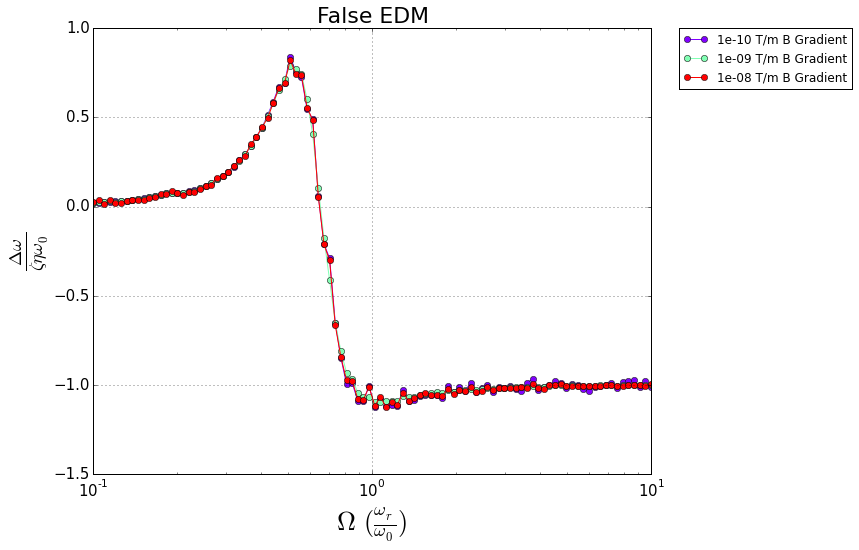

In [6]:
x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "DeltaOmega")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    zeta=b_gradient_str[i]*0.235/(2.*1e-6)
    Omega=[j/Omega_scale_factor for j in x[i]]
    scaled_edm=[j/(zeta*eta*omega_0) for j in y[i]]
    plt.semilogx(Omega,scaled_edm,marker='o',label = legend_titles_b_gradients[i],c=next(color))

plt.tick_params(labelsize=15)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=26)
plt.ylabel(r'$\frac{\Delta\omega}{\zeta\eta\omega_0}$', fontsize=26)
plt.title('False EDM', fontsize=22)
plt.grid(True)
#plt.axis([ 8e-19, 2e-13,1e-3, 2e2])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

##**Diffuse reflection probability = $0\%$ (specular), 2D**

In [7]:
lines = [range(1617, 1717),range(1717, 1817),range(1817, 1917)]
axis_range_for_stdev = [ 8e-19, 2e-13,1e-10, 1e-1]

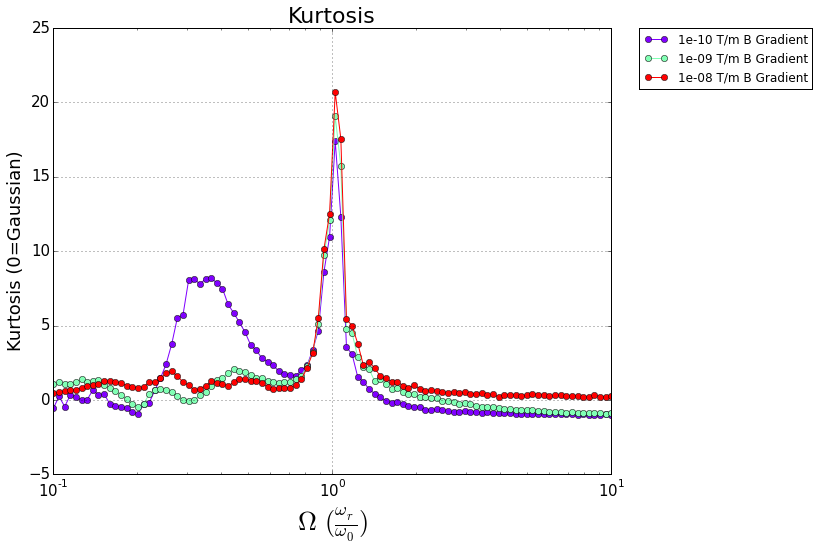

In [8]:
x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "Par_PhiKurtosis")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    Omega=[j/Omega_scale_factor for j in x[i]]
    plt.semilogx(Omega,y[i],marker='o',label = legend_titles_b_gradients[i],c=next(color))

plt.tick_params(labelsize=15)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=26)
plt.ylabel('Kurtosis (0=Gaussian)', fontsize=18)
plt.title('Kurtosis', fontsize=22)
plt.grid(True)
#plt.axis([ 0,2,-2,20])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

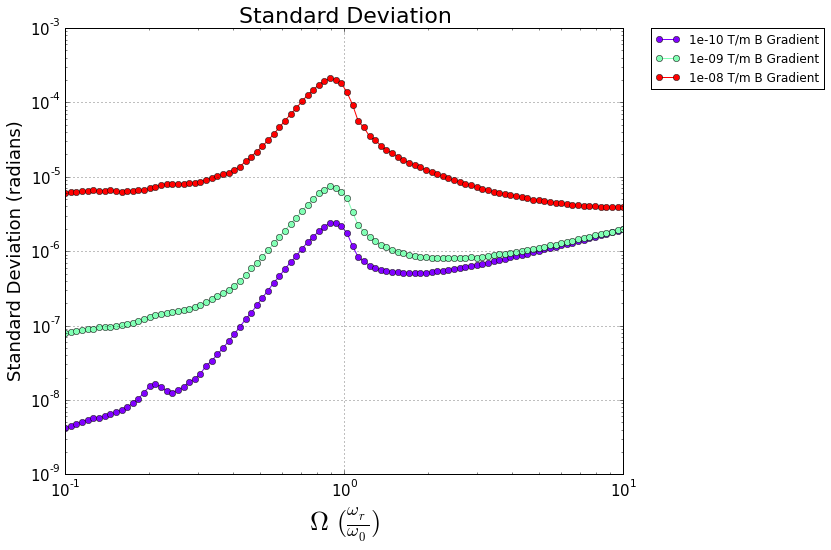

In [9]:
x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "Par_PhiStDev")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    Omega=[j/Omega_scale_factor for j in x[i]]
    plt.loglog(Omega,y[i],marker='o',label = legend_titles_b_gradients[i],c=next(color))

plt.tick_params(labelsize=15)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=26)
plt.ylabel('Standard Deviation (radians)', fontsize=18)
plt.title('Standard Deviation', fontsize=22)
plt.grid(True)
#plt.axis([ 8e-19, 2e-13,1e-3, 2e2])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

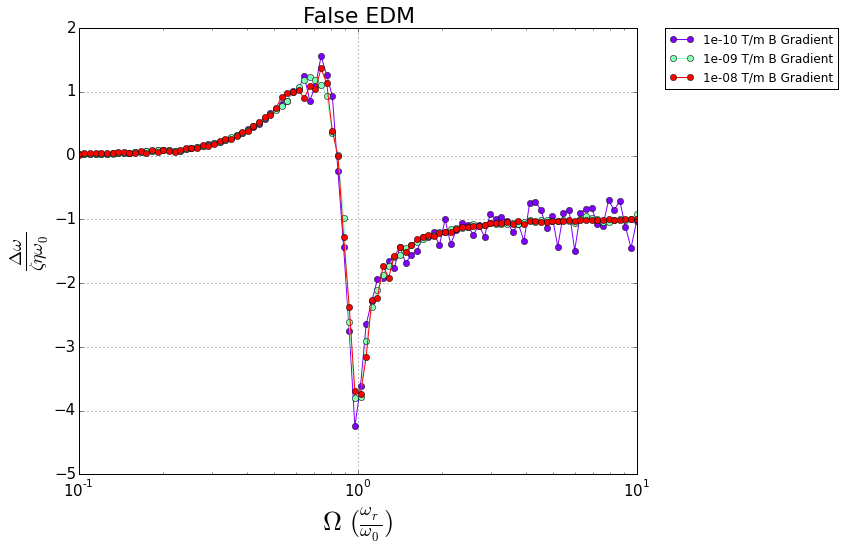

In [10]:
x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "DeltaOmega")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    zeta=b_gradient_str[i]*0.235/(2.*1e-6)
    Omega=[j/Omega_scale_factor for j in x[i]]
    scaled_edm=[j/(zeta*eta*omega_0) for j in y[i]]
    plt.semilogx(Omega,scaled_edm,marker='o',label = legend_titles_b_gradients[i],c=next(color))

plt.tick_params(labelsize=15)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=26)
plt.ylabel(r'$\frac{\Delta\omega}{\zeta\eta\omega_0}$', fontsize=26)
plt.title('False EDM', fontsize=22)
plt.grid(True)
#plt.axis([ 8e-19, 2e-13,1e-3, 2e2])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

##**Diffuse reflection probability = $100\%$**, 3D

In [11]:
lines = [range(2286, 2386),range(2386, 2486),range(2486, 2586)]

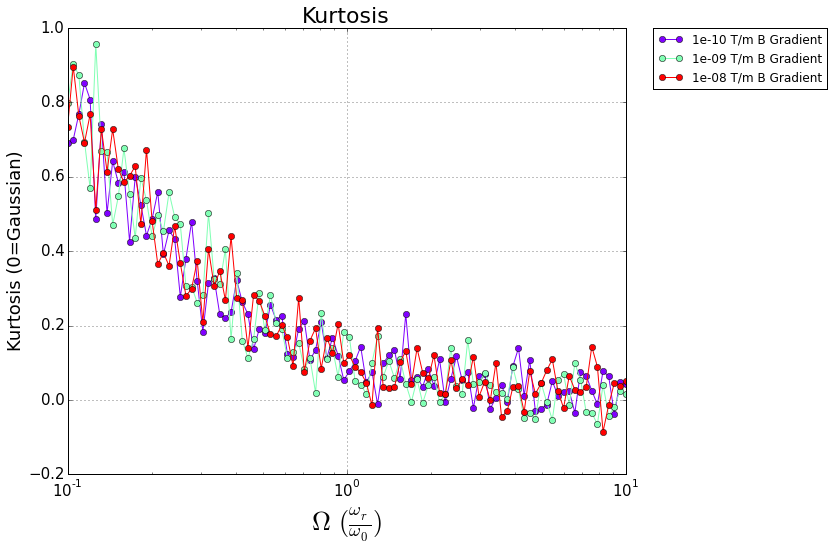

In [12]:
x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "Par_PhiKurtosis")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    Omega=[j/Omega_scale_factor for j in x[i]]
    plt.semilogx(Omega,y[i],marker='o',label = legend_titles_b_gradients[i],c=next(color))

plt.tick_params(labelsize=15)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=26)
plt.ylabel('Kurtosis (0=Gaussian)', fontsize=18)
plt.title('Kurtosis', fontsize=22)
plt.grid(True)
#plt.axis([ 0,2,-2,20])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

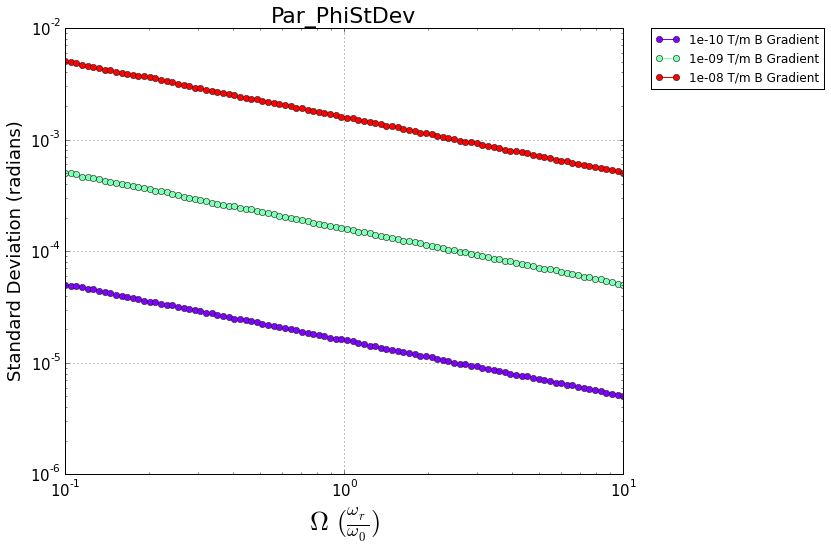

In [13]:
x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "Par_PhiStDev")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    Omega=[j/Omega_scale_factor for j in x[i]]
    plt.loglog(Omega,y[i],marker='o',label = legend_titles_b_gradients[i],c=next(color))

plt.tick_params(labelsize=15)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=26)
plt.ylabel('Standard Deviation (radians)', fontsize=18)
plt.title('Par_PhiStDev', fontsize=22)
plt.grid(True)
#plt.axis([ 8e-19, 2e-13,1e-3, 2e2])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

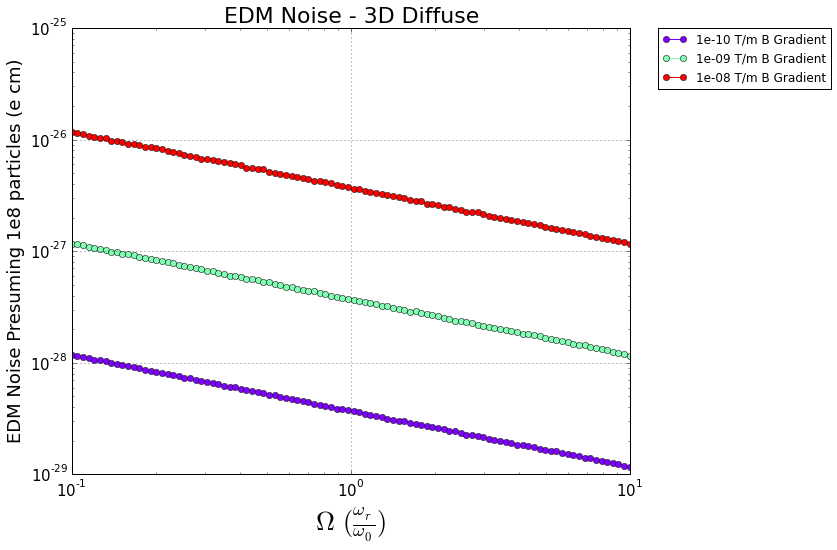

In [14]:
x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "Par_PhiStDev")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    Omega=[j/Omega_scale_factor for j in x[i]]
    false_edm_error=[srkanalysis.convert_std_dev_to_false_edm_measurement_error(j,e_field,meas_time,1e8) for j in y[i]]
    plt.loglog(Omega,false_edm_error,marker='o',label = legend_titles_b_gradients[i],c=next(color))

plt.tick_params(labelsize=15)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=26)
plt.ylabel('EDM Noise Presuming 1e8 particles (e cm)', fontsize=18)
plt.title('EDM Noise - 3D Diffuse', fontsize=22)
plt.grid(True)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(srk_sys.graphs_dir+'EDMNoise_3DDiffuse.pdf')
plt.show()

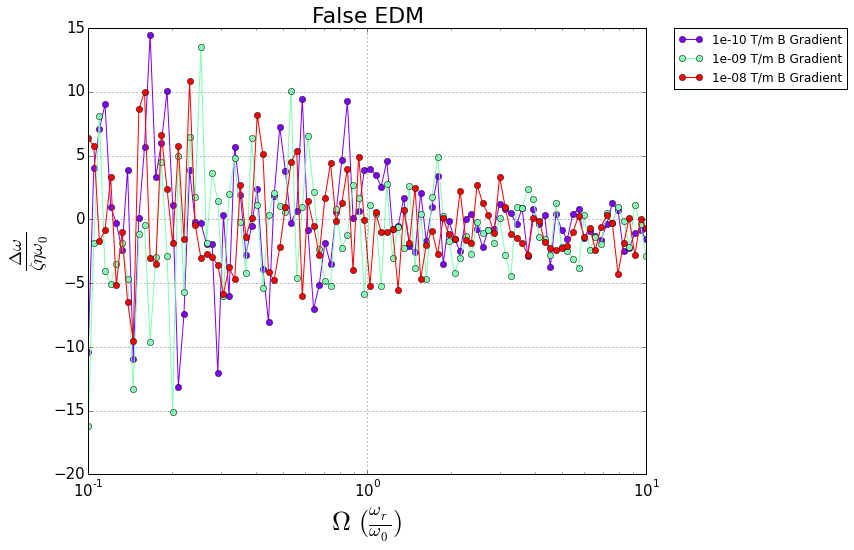

In [15]:
x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "DeltaOmega")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    zeta=b_gradient_str[i]*0.235/(2.*1e-6)
    Omega=[j/Omega_scale_factor for j in x[i]]
    scaled_edm=[j/(zeta*eta*omega_0) for j in y[i]]
    plt.semilogx(Omega,scaled_edm,marker='o',label = legend_titles_b_gradients[i],c=next(color))

plt.tick_params(labelsize=15)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=26)
plt.ylabel(r'$\frac{\Delta\omega}{\zeta\eta\omega_0}$', fontsize=26)
plt.title('False EDM', fontsize=22)
plt.grid(True)
#plt.axis([ 8e-19, 2e-13,1e-3, 2e2])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

##**Diffuse reflection probability = $0\%$ (specular)**, 3D

In [16]:
lines = [range(2586, 2686),range(2686, 2786),range(2786, 2886)]

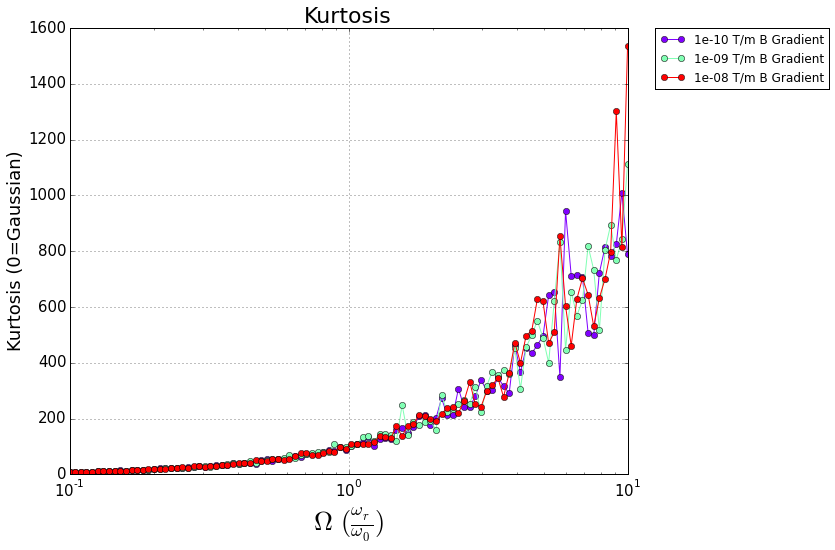

In [17]:
x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "Par_PhiKurtosis")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    Omega=[j/Omega_scale_factor for j in x[i]]
    plt.semilogx(Omega,y[i],marker='o',label = legend_titles_b_gradients[i],c=next(color))

plt.tick_params(labelsize=15)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=26)
plt.ylabel('Kurtosis (0=Gaussian)', fontsize=18)
plt.title('Kurtosis', fontsize=22)
plt.grid(True)
#plt.axis([ 0,2,-2,20])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

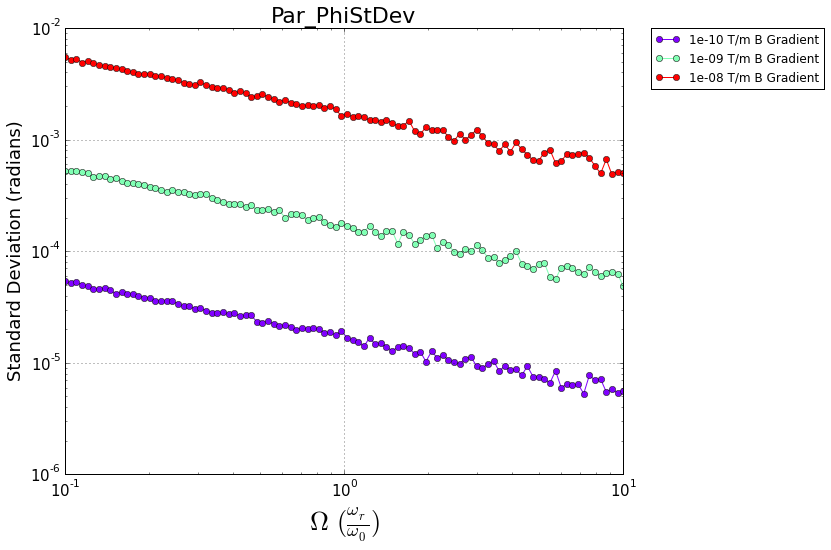

In [18]:
x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "Par_PhiStDev")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    Omega=[j/Omega_scale_factor for j in x[i]]
    plt.loglog(Omega,y[i],marker='o',label = legend_titles_b_gradients[i],c=next(color))

plt.tick_params(labelsize=15)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=26)
plt.ylabel('Standard Deviation (radians)', fontsize=18)
plt.title('Par_PhiStDev', fontsize=22)
plt.grid(True)
#plt.axis([ 8e-19, 2e-13,1e-3, 2e2])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

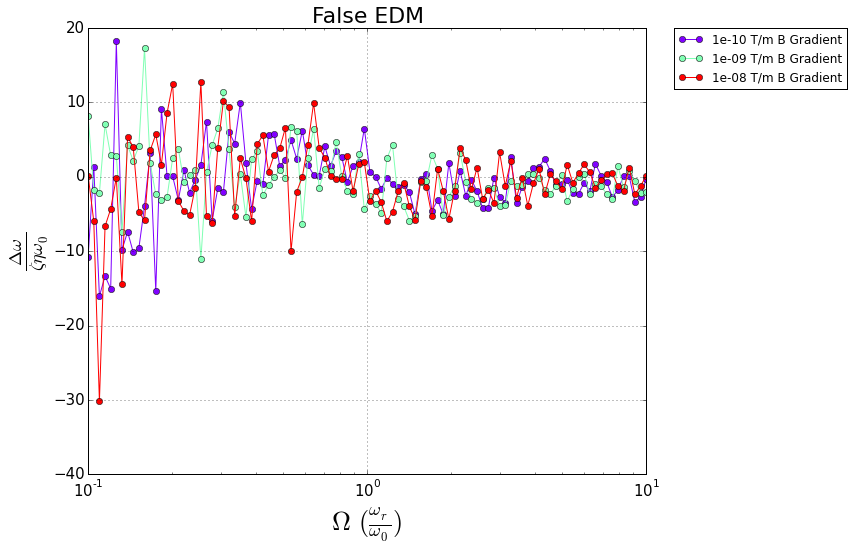

In [19]:
x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "DeltaOmega")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    zeta=b_gradient_str[i]*0.235/(2.*1e-6)
    Omega=[j/Omega_scale_factor for j in x[i]]
    scaled_edm=[j/(zeta*eta*omega_0) for j in y[i]]
    plt.semilogx(Omega,scaled_edm,marker='o',label = legend_titles_b_gradients[i],c=next(color))

plt.tick_params(labelsize=15)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=26)
plt.ylabel(r'$\frac{\Delta\omega}{\zeta\eta\omega_0}$', fontsize=26)
plt.title('False EDM', fontsize=22)
plt.grid(True)
#plt.axis([ 8e-19, 2e-13,1e-3, 2e2])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# **Diffuse reflection probability = $0\%$ (specular)**, 2.5D

In [20]:
lines = [range(3254, 3354),range(3354, 3454),range(3454, 3554)]

In [21]:
z_vel = [0.1, 10, 100]
legend_titles_z_vel=[str(x)+' m/s Fixed Z Direction Velocity' for x in z_vel]

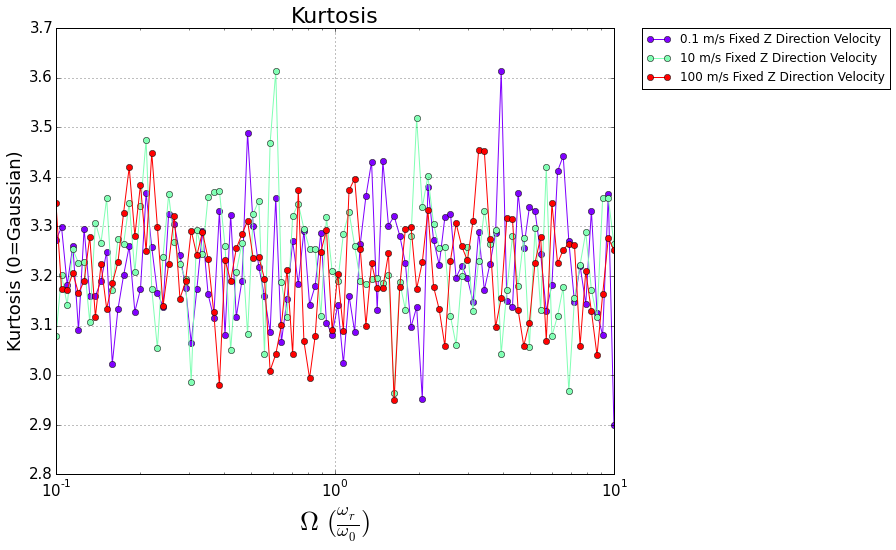

In [22]:
x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "Par_PhiKurtosis")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    Omega=[j/Omega_scale_factor for j in x[i]]
    plt.semilogx(Omega,y[i],marker='o',label = legend_titles_z_vel[i],c=next(color))

plt.tick_params(labelsize=15)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=26)
plt.ylabel('Kurtosis (0=Gaussian)', fontsize=18)
plt.title('Kurtosis', fontsize=22)
plt.grid(True)
#plt.axis([ 0,2,-2,20])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

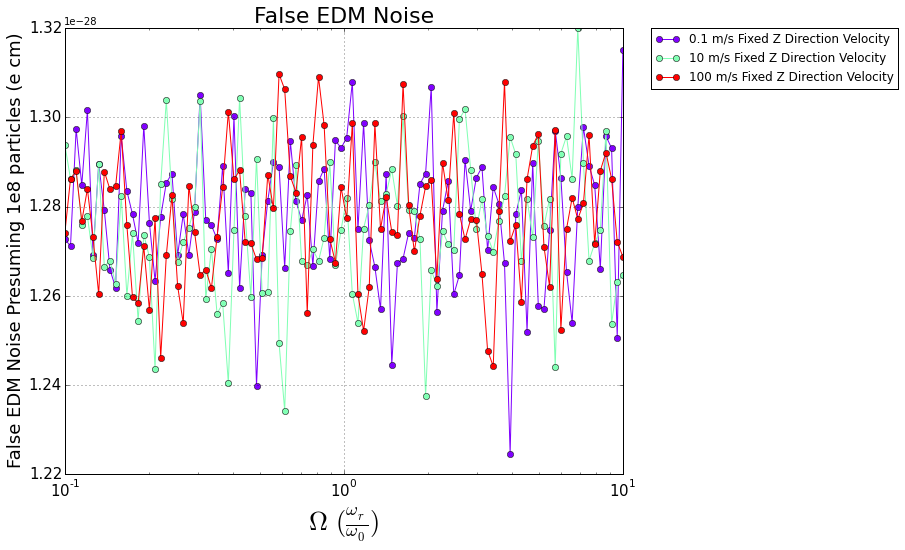

In [23]:
x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "Par_PhiStDev")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    Omega=[j/Omega_scale_factor for j in x[i]]
    false_edm_error=[srkanalysis.convert_std_dev_to_false_edm_measurement_error(j,e_field,meas_time,1e8) for j in y[i]]
    plt.semilogx(Omega,false_edm_error,marker='o',label = legend_titles_z_vel[i],c=next(color))

plt.tick_params(labelsize=15)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=26)
plt.ylabel('False EDM Noise Presuming 1e8 particles (e cm)', fontsize=18)
plt.title('False EDM Noise', fontsize=22)
plt.grid(True)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

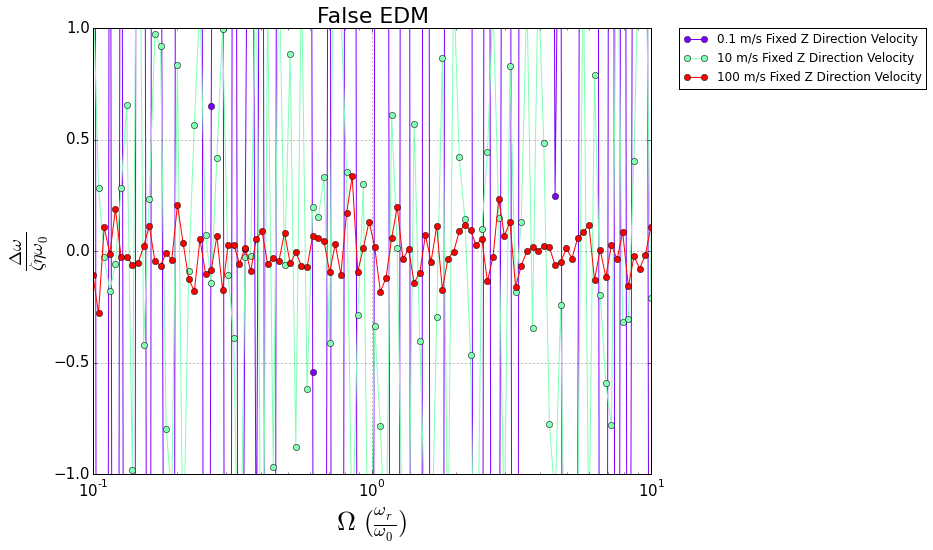

In [24]:
x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "DeltaOmega")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    zeta=b_gradient_str[i]*0.235/(2.*1e-6)
    Omega=[j/Omega_scale_factor for j in x[i]]
    scaled_edm=[j/(zeta*eta*omega_0) for j in y[i]]
    plt.semilogx(Omega,scaled_edm,marker='o',label = legend_titles_z_vel[i],c=next(color))

plt.tick_params(labelsize=15)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=26)
plt.ylabel(r'$\frac{\Delta\omega}{\zeta\eta\omega_0}$', fontsize=26)
plt.title('False EDM', fontsize=22)
plt.grid(True)
plt.axis([ .1, 10,-1, 1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()